In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from mvtec_dataloader.mvtec_ad import MVTecAD, inspect_dataloader

torch.cuda.is_available()

True

In [2]:
def _convert_label(x):
    '''
    convert anomaly label. 0: normal; 1: anomaly.
    :param x (int): class label
    :return: 0 or 1
    '''
    return 0 if x == 0 else 1

## TODO write contamination dataset

# define transforms
transform = transforms.Compose([transforms.Resize((300, 300)), transforms.ToTensor()])
target_transform = transforms.Lambda(_convert_label)

# load data
mvtec = MVTecAD('data',
                subset_name='cable',
                train=False,
                transform=transform,
                mask_transform=transform,
                target_transform=target_transform,
                download_subsets=True,
                download_fullset=True)


/home/bule/projects/MVTec_Visualizer/mvtec_dataloader/mvtec_ad.py:179: UserWarning: dataset already exists: skipping download, use download_fullset=False to suppress
  warnings.warn("dataset already exists: skipping download, use download_fullset=False to suppress")


In [3]:
# feed to data loader
data_loader = DataLoader(mvtec,batch_size=8,
                            shuffle=True,
                            num_workers=8,
                            pin_memory=True,
                            drop_last=True)

0  is anomaly:  0


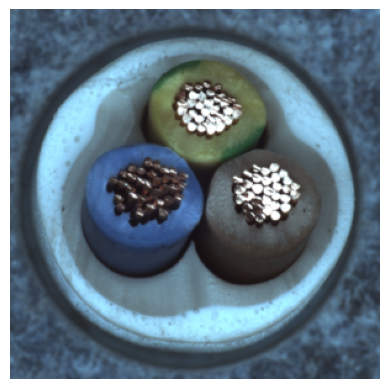

1  is anomaly:  1


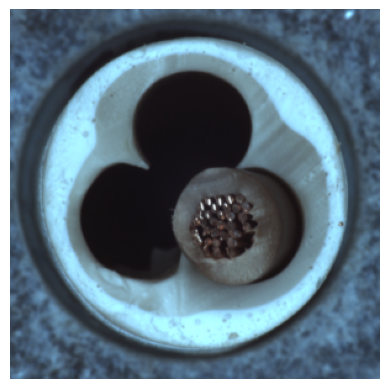

2  is anomaly:  1


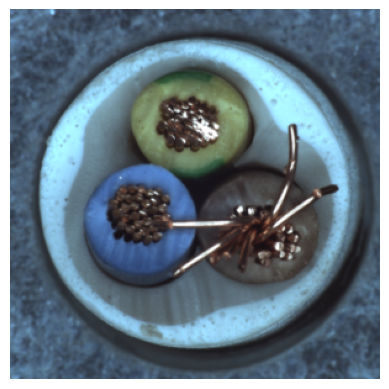

3  is anomaly:  1


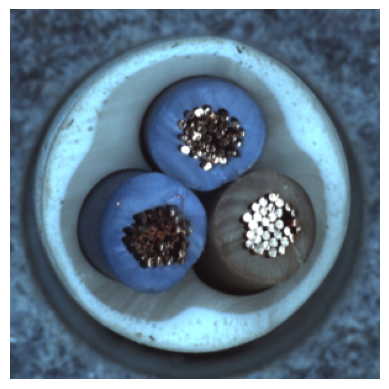

4  is anomaly:  1


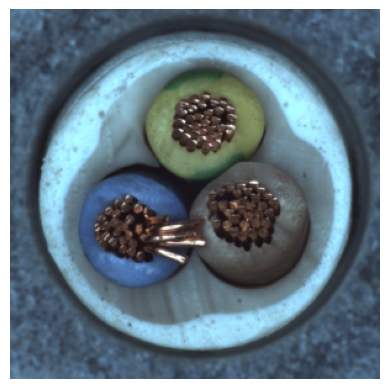

5  is anomaly:  0


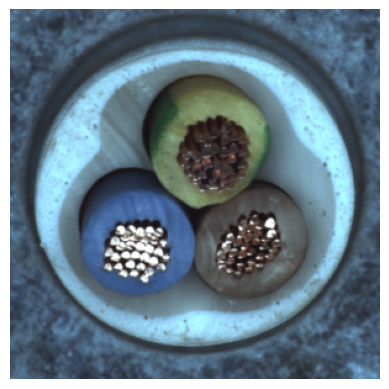

6  is anomaly:  0


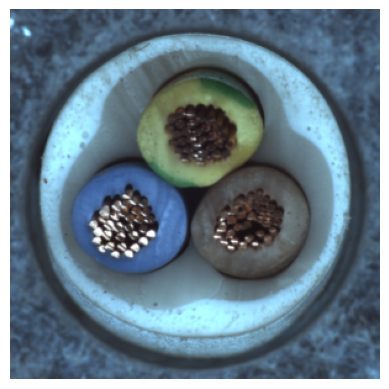

7  is anomaly:  1


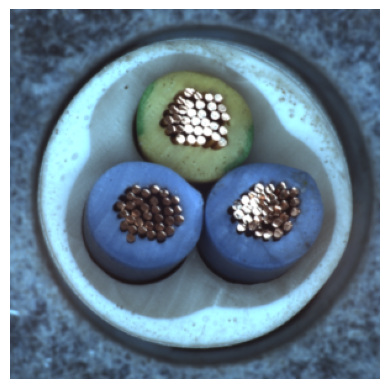

8  is anomaly:  0


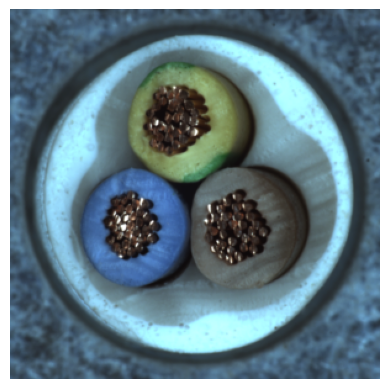

9  is anomaly:  0


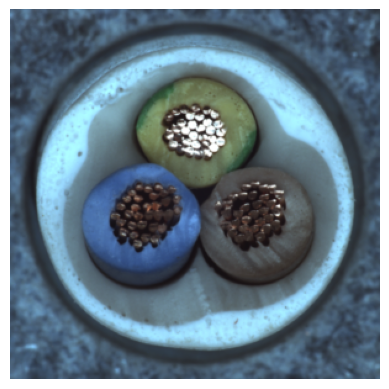

In [4]:
inspect_dataloader(data_loader,n_batches=10)